# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = df.iloc[:, 1:], df.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea







#### 1. ¿De qué se trata el conjunto de datos?

El conjunto de datos describe distintas caracteristicas de personas que solicitaron un credito con garantia hipotecaria. Entre esos datos, se obtiene por ejemplo, el valor adeudado de la hipoteca, el valor de la propiedad,hace cuanto tiempo estan trabajando en el mismo lugar,etc

Acerca de la compañía
La empresa Dream Housing Finance se ocupa de todos los préstamos hipotecarios. Tienen presencia en todas las áreas urbanas, semiurbanas y rurales. El cliente primero solicita un préstamo hipotecario después de que la compañía valida la elegibilidad del cliente para el préstamo.

Problema
La empresa desea automatizar el proceso de elegibilidad del préstamo (en tiempo real) en función de los detalles del cliente proporcionados al completar el formulario de solicitud en línea. Estos detalles son género, estado civil, educación, número de dependientes, ingresos, monto del préstamo, historial crediticio y otros. Para automatizar este proceso, han dado un problema para identificar los segmentos de clientes, los que son elegibles para el monto del préstamo para poder dirigirse específicamente a estos clientes. Aquí han proporcionado un conjunto de datos parcial.







#### 2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo que hay que predecir, es la variable BAD que hace referencia a si un cliente va a ser moroso a o no. Es un valor booleano que va a tener un 1 si el cliente es moroso y un 0 si el modelo predice que va a pagar el credito

#### 3. ¿Qué información (atributos) hay disponible para hacer la predicción?

* TARGET: BAD, 1 = impago del préstamo, 0 = préstamo reembolsado 
* LOAN: El monto del credito
* MORTDUE: Monto adeudado de la hipoteca existente
* VALUE: El valor de la propiedad
* YOJ: Años en el trabajo actual
* DEROG: Número de informes desfavorables importantes
* DELINQ: Número de líneas comerciales morosas
* CLAGE: Antigüedad de la línea comercial más antigua en meses
* CLNO: Número de líneas comerciales
* NINQ: Número de consultas crediticias recientes
* DEBTINC: Relación deuda-ingresos


In [8]:
df.columns

Index(['TARGET', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

#### 4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?
A priori, podríamos suponer que el monto del credito, el valor de la propiedad y si debe plata de la hipoteca serían buenos predictores. Pero también podría ser la variable de años en el trabajo actual.

# Exploración de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


In [10]:
df.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


A priori no hay valores nan, ya que todas las columnas cuentan con 1854 observaciones. 

In [11]:
df['TARGET'] = df.TARGET.astype(str)

In [12]:
columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC']

0    1545
1     309
Name: TARGET, dtype: int64


<AxesSubplot:>

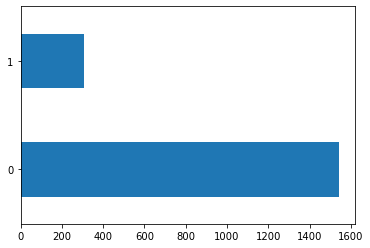

In [13]:
print(df.TARGET.value_counts())
df["TARGET"].value_counts().plot(kind='barh')


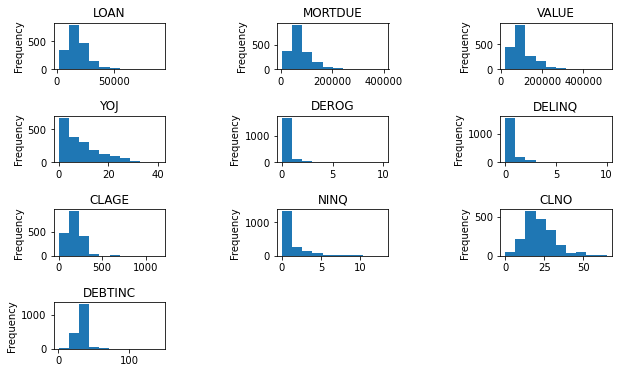

In [14]:
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=1, wspace=1)
ranges = range(10)
for column, i in zip(columns, ranges):
    ax = fig.add_subplot(4, 3, i+1)
    ax = df[column].plot.hist().set_title(column)
    

En general las distribuciones presentan asimetría positiva y con rangos muy discímiles.

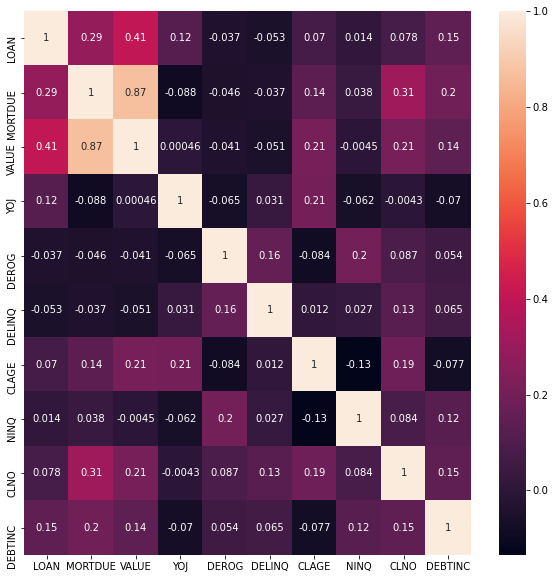

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt

# taking all rows but only 6 columns
correlation_mat = df.corr()
plt.figure(figsize=(10,10))

sns.heatmap(correlation_mat, annot = True)
plt.show()

En general, los niveles de correlación entre las variables son bajos, con excepción de VALUE con MORTDUE y LOAN, por lo que podría eliminarse una de esas variables para evitar problemas luego.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


clf = make_pipeline(StandardScaler(),
                 SGDClassifier(random_state = 42))
clf.fit(X_train,y_train)
test_predictions=clf.predict(X_test)
train_predictions=clf.predict(X_train)

print('Metricas de entrenamiento')

print(classification_report(y_train, train_predictions,zero_division=0))

print('Metricas de Test')

print(classification_report(y_test, test_predictions,zero_division=0))

Metricas de entrenamiento
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1232
           1       0.48      0.29      0.36       251

    accuracy                           0.83      1483
   macro avg       0.67      0.61      0.63      1483
weighted avg       0.80      0.83      0.81      1483

Metricas de Test
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       313
           1       0.38      0.24      0.29        58

    accuracy                           0.82       371
   macro avg       0.62      0.58      0.60       371
weighted avg       0.79      0.82      0.80       371



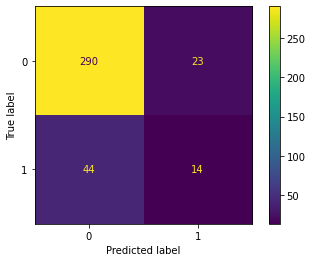

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [45]:
from scipy import stats
param_dist = {
    'loss': [
        'hinge',        # SVM
        'log',          # logistic regression
    ],
    'learning_rate':['constant', 'optimal','adaptive'],
    'alpha': [0.1,0.5,0.6,0.7,0.8,0.9,1,5,10,50]}

En esta sección usamos la funcionalidad GridSearch para encontrar la mejor combinación de hiperparámetros. En particular, para el parámetro alpha comenzamos con 6 valores, pero al notar que el mejor resultado estaba cerca de alpha 1 decidimos incorporar valores decimales entre 0.5 y 1, resultando alpha=0.6 como el mejor.


In [46]:
from sklearn.model_selection import GridSearchCV

model = SGDClassifier(random_state=0, eta0=0.1)

cv = GridSearchCV(model, param_dist, scoring ='accuracy', refit=True, cv=5)
cv.fit(X, y);

In [47]:
results = cv.cv_results_

data_sdg_classifier=pd.DataFrame(results)
data_sdg_classifier.sort_values('rank_test_score')[:6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.003989,0.000632,0.001796,4.001629e-04,0.6,constant,hinge,"{'alpha': 0.6, 'learning_rate': 'constant', 'l...",0.832884,0.832884,0.832884,0.832884,0.835135,0.833334,0.0009,1
30,0.003500,0.000616,0.001986,6.314681e-04,0.9,constant,hinge,"{'alpha': 0.9, 'learning_rate': 'constant', 'l...",0.832884,0.832884,0.832884,0.832884,0.835135,0.833334,0.0009,1
31,0.005857,0.000867,0.001995,6.315808e-04,0.9,constant,log,"{'alpha': 0.9, 'learning_rate': 'constant', 'l...",0.832884,0.832884,0.832884,0.832884,0.835135,0.833334,0.0009,1
19,0.004786,0.000747,0.001790,3.972754e-04,0.7,constant,log,"{'alpha': 0.7, 'learning_rate': 'constant', 'l...",0.832884,0.832884,0.832884,0.832884,0.835135,0.833334,0.0009,1
18,0.004387,0.001196,0.001995,7.478899e-07,0.7,constant,hinge,"{'alpha': 0.7, 'learning_rate': 'constant', 'l...",0.832884,0.832884,0.832884,0.832884,0.835135,0.833334,0.0009,1
36,0.003801,0.000392,0.001983,6.321790e-04,1,constant,hinge,"{'alpha': 1, 'learning_rate': 'constant', 'los...",0.832884,0.832884,0.832884,0.832884,0.835135,0.833334,0.0009,1


In [48]:
data_sdg_classifier[['param_learning_rate','param_loss','param_alpha','mean_test_score','std_test_score','rank_test_score']]

,param_learning_rate,param_loss,param_alpha,mean_test_score,std_test_score,rank_test_score
0,constant,hinge,0.1,0.832256,0.002536,19
1,constant,log,0.1,0.832256,0.002536,19
2,optimal,hinge,0.1,0.743610,0.173207,40
3,optimal,log,0.1,0.692094,0.260130,56
4,adaptive,hinge,0.1,0.826865,0.009776,30
5,adaptive,log,0.1,0.800989,0.056212,35
6,constant,hinge,0.5,0.832795,0.001568,17
7,constant,log,0.5,0.832795,0.001568,17
8,optimal,hinge,0.5,0.743610,0.173207,40
9,optimal,log,0.5,0.699642,0.262259,53


In [49]:
cv.best_estimator_

SGDClassifier(alpha=0.6, eta0=0.1, learning_rate='constant', random_state=0)

In [50]:
print('Evaluacion de conjunto de entrenamiento con el mejor modelo')
predictions=cv.best_estimator_.predict(X_train)
print(classification_report(y_train, predictions,zero_division=0))

print('Evaluacion de conjunto de test con el mejor modelo')
predictions=cv.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions,zero_division=0))

Evaluacion de conjunto de entrenamiento con el mejor modelo
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1232
           1       0.00      0.00      0.00       251

    accuracy                           0.83      1483
   macro avg       0.42      0.50      0.45      1483
weighted avg       0.69      0.83      0.75      1483

Evaluacion de conjunto de test con el mejor modelo
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



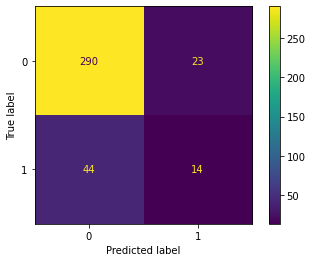

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cv.classes_)
disp.plot() 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [52]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=0)
model = model.fit(X_train,y_train)

train_predictions_tree=model.predict(X_train)
predictions_tree=model.predict(X_test)


print('Evaluacion sobre conjunto de train')
print(classification_report(y_train, train_predictions_tree))

print('Evaluacion sobre conjunto de test')
print(classification_report(y_test, predictions_tree))

Evaluacion sobre conjunto de train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

Evaluacion sobre conjunto de test
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



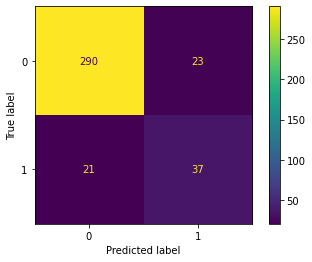

In [53]:
cm = confusion_matrix(y_test, predictions_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cv.classes_)
disp.plot() 

Sin ningún ajuste de los hiperparámetros 37/58 morosos se predicen correctamente, mientras que 23 no morosos se incluyen en esta categoría. 

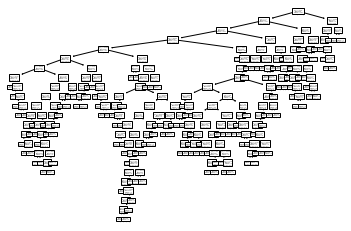

In [54]:
from sklearn import tree
tree.plot_tree(model)
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [55]:
param_dist_tree = {
    'criterion': [
        'entropy',      
        'gini',          
    ],
    'max_depth':[5,6,7,8,9,10,20,50,100,200],
    'min_samples_leaf': [1,5,10,50]}

In [56]:
model=DecisionTreeClassifier(random_state=0)
cv_tree = GridSearchCV(model, param_dist_tree, scoring ='accuracy', refit=True, cv=5)
cv_tree.fit(X, y);

In [57]:
tree_results = cv_tree.cv_results_

data_tree_classifier=pd.DataFrame(tree_results)
data_tree_classifier.sort_values('rank_test_score')[:6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,0.010140,0.001231,0.002542,0.000842,gini,6,10,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.859838,0.876011,0.867925,0.911051,0.883784,0.879722,0.017586,1
54,0.011955,0.001660,0.002985,0.000644,gini,8,10,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.876011,0.876011,0.857143,0.911051,0.872973,0.878638,0.017655,2
50,0.010366,0.001006,0.002599,0.000494,gini,7,10,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.870620,0.876011,0.857143,0.911051,0.870270,0.877019,0.018115,3
52,0.010724,0.000395,0.002312,0.000601,gini,8,1,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.851752,0.862534,0.876011,0.900270,0.889189,0.875951,0.017506,4
56,0.013167,0.001311,0.003190,0.000744,gini,9,1,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.854447,0.867925,0.862534,0.905660,0.878378,0.873789,0.017731,5
42,0.009244,0.001044,0.002609,0.000486,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.859838,0.873315,0.859838,0.911051,0.864865,0.873782,0.019275,6


In [58]:
cv_tree.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}

Nuevamente luego de obtener los mejores parámetros ajustamos los parámetros de entrada, dando mayores opciones cercanas a la mejor profundidad máxima y a al mínimo de hojas. Finalmente uno de los parámetros encontro un nuevo óptimo, mientras que el otro se mantuvo.

In [59]:
data_tree_classifier[['param_criterion','param_max_depth','param_min_samples_leaf','mean_test_score','std_test_score','rank_test_score']]

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,entropy,5,1,0.866229,0.020403,16
1,entropy,5,5,0.863533,0.022751,28
2,entropy,5,10,0.864074,0.016960,25
3,entropy,5,50,0.843589,0.026038,64
4,entropy,6,1,0.867849,0.020769,15
...,...,...,...,...,...,...
75,gini,100,50,0.858683,0.013922,37
76,gini,200,1,0.850605,0.016399,54
77,gini,200,5,0.851136,0.014575,50
78,gini,200,10,0.865688,0.017975,18


In [60]:
print('Evaluacion de conjunto de entrenamiento con el mejor modelo')
predictions=cv_tree.best_estimator_.predict(X_train)
print(classification_report(y_train, predictions))

print('Evaluacion de conjunto de test con el mejor modelo')
predictions=cv_tree.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions))

Evaluacion de conjunto de entrenamiento con el mejor modelo
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1232
           1       0.94      0.54      0.69       251

    accuracy                           0.92      1483
   macro avg       0.93      0.77      0.82      1483
weighted avg       0.92      0.92      0.91      1483

Evaluacion de conjunto de test con el mejor modelo
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       313
           1       0.90      0.48      0.63        58

    accuracy                           0.91       371
   macro avg       0.91      0.74      0.79       371
weighted avg       0.91      0.91      0.90       371



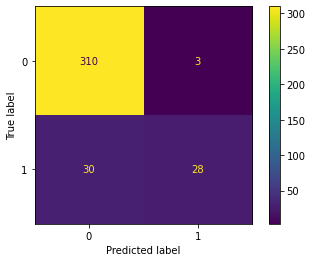

In [61]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cv.classes_)
disp.plot() 

Con el ajuste de hiperparámetros, solo 3 no morosos fueron predichos como morosos, mientras que 30 de estos últimos no fueron detectados por el árbol de decisión. Dado que se buscó optimizar accuracy, no es de extrañar la mejora sustancial tras la optimización de hiperparámetros disminuye notablemente los falsos positivos, a la vez que aumenta los falsos negativos.

In [62]:
model=DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_leaf=10, random_state=0)
clf = model.fit(X, y);

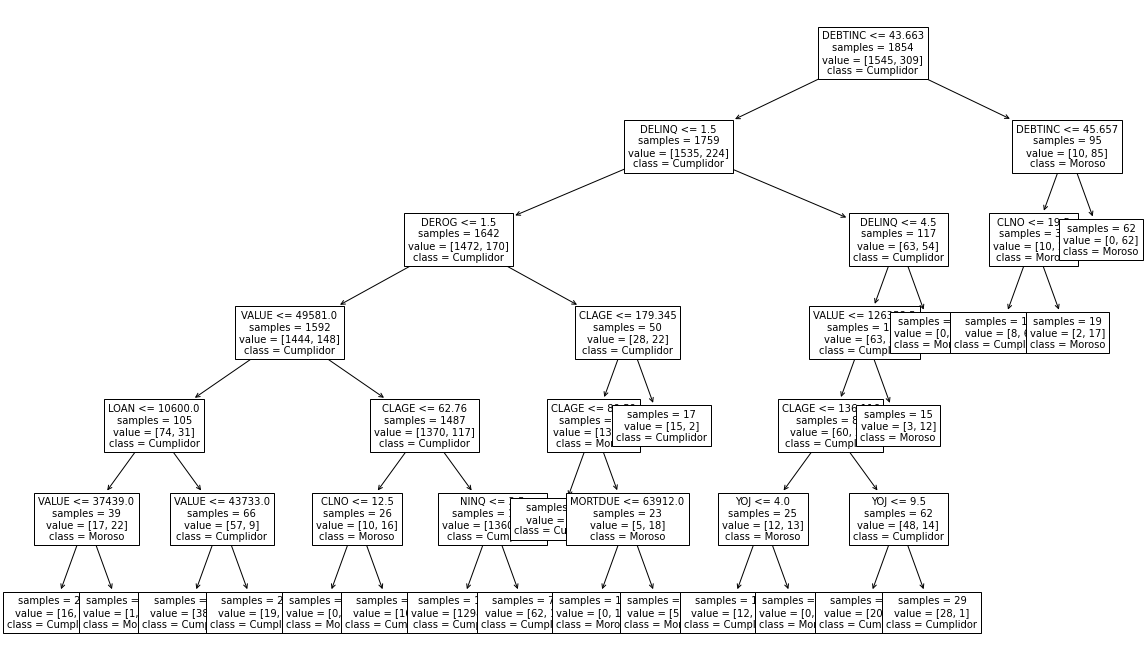

In [63]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(clf, fontsize=10,feature_names=df.columns[1:],impurity=False,class_names=['Cumplidor','Moroso'])
plt.show()

Analizando los nodos superiores del árbol de decisión podemos ver que la variable más importante es DEBTINC, la relación deuda-ingresos, seguida por DELINQ, el número de líneas comerciales morosas y CLNO, el número de líneas comerciales. 
